#  Question 1: Stacks
#### a) Implement a stack class in Python with methods for push, pop, and is_empty.

<img src=attachment:dfdf9e19-043e-4cfe-8b77-16821825b5eb.png width="500">
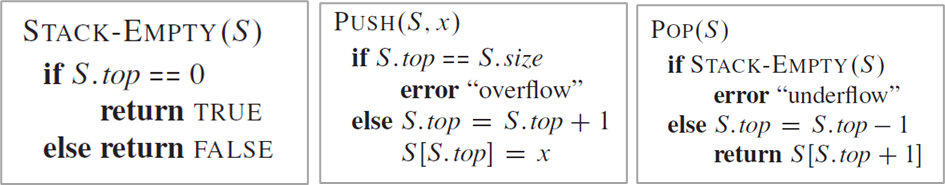

In [7]:
class Stack:
    def __init__(self, size):
        self.size = size
        self.stack = [None] * (size + 1)  # Using 1-indexed array
        self.top = 0

    def push(self, x):
        if self.top == self.size:
            raise OverflowError("Stack overflow")
        else:
            self.top += 1
            self.stack[self.top] = x

    def is_empty(self):
        return self.top == 0

    def pop(self):
        if self.is_empty():
            raise ValueError("Stack underflow")
        else:
            popped_value = self.stack[self.top]
            self.top -= 1
            return popped_value

# Test the Stack class
stack = Stack(size=5)
stack.push(10)
stack.push(20)
stack.push(30)
# stack.push(40)
# stack.push(50)
# stack.push(60)


print("Is empty?", stack.is_empty())  # Output: False
print("Popped value:", stack.pop())   # Output: 30
print("Popped value:", stack.pop())   # Output: 20
print("Is empty?", stack.is_empty())  # Output: False
print("Popped value:", stack.pop())   # Output: 10
print("Is empty?", stack.is_empty())  # Output: True
# print("Popped value:", stack.pop())   # Output: "Stack underflow"


Is empty? False
Popped value: 30
Popped value: 20
Is empty? False
Popped value: 10
Is empty? True


#### Another way to solve (a) using build-in methods .append & .pop

In [8]:
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        if not self.is_empty():
            return self.items.pop()

    def is_empty(self):
        return len(self.items) == 0

# Test the Stack class
stack = Stack()
print(stack.pop())  # Output: None
stack.push(10)
stack.push(20)
stack.push(30)
print(stack.pop())  # Output: 30
print(stack.is_empty())  # Output: False

None
30
False


#### b) Checks if a given string has balanced parentheses

In [9]:
def is_balanced_parentheses(expression):
    stack = []
    opening_brackets = ['(', '[', '{']
    closing_brackets = [')', ']', '}']
    
    for char in expression:
        if char in opening_brackets:
            stack.append(char)
        elif char in closing_brackets:
            if not stack:
                return False
            top = stack.pop()
            if opening_brackets.index(top) != closing_brackets.index(char):
                return False
    
    return len(stack) == 0

# Test the function
test_string = "{[()]}[({})]"
result = is_balanced_parentheses(test_string)
print(f"The given string '{test_string}' is balanced: {result}")


test_string = "Example[1] has the following subquestions (a), (b), (c, and (d)"
result = is_balanced_parentheses(test_string)
print(f"The given string '{test_string}' is balanced: {result}")


The given string '{[()]}[({})]' is balanced: True
The given string 'Example[1] has the following subquestions (a), (b), (c, and (d)' is balanced: False


#### c) Modify your stack class to include a method get_top that returns the top element without removing it.

In [10]:
class Stack:
    def __init__(self, size):
        self.size = size
        self.stack = [None] * (size + 1)  # Using 1-indexed array
        self.top = 0

    def push(self, x):
        if self.top == self.size:
            raise OverflowError("Stack overflow")
        else:
            self.top += 1
            self.stack[self.top] = x

    def is_empty(self):
        return self.top == 0

    def pop(self):
        if self.is_empty():
            raise ValueError("Stack underflow")
        else:
            popped_value = self.stack[self.top]
            self.top -= 1
            return popped_value

    def get_top(self):
        if self.is_empty():
            raise ValueError("Stack is empty")
        else:
            return self.stack[self.top]

# Test the modified Stack class
stack = Stack(size=5)
stack.push(10)
stack.push(20)
stack.push(30)
print("Top element:", stack.get_top())  # Output: 30
print("Popped value:", stack.pop())     # Output: 30
print("Top element:", stack.get_top())  # Output: 20

Top element: 30
Popped value: 30
Top element: 20


# Question 2: Queues
**a) Implement a queue class in Python with methods for enqueue, dequeue, and is_empty.**

<img src=attachment:105ccf89-143d-469a-981a-dbba89152d84.png width="500">
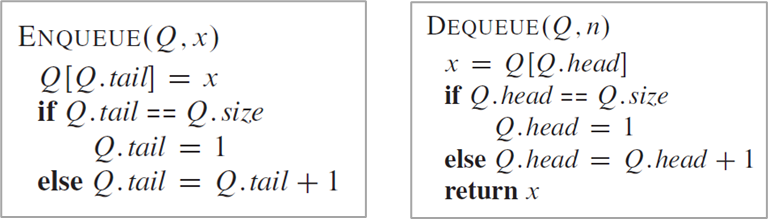

In [12]:
class Queue:
    def __init__(self, size):
        self.size = size
        self.queue = [None] * (size + 1)  # Using 1-indexed array
        self.head = 1
        self.tail = 1

    def enqueue(self, x):
        self.queue[self.tail] = x
        if self.tail == self.size:
            self.tail = 1
        else:
            self.tail += 1

    def dequeue(self):
        if self.is_empty():
            raise ValueError("Queue is empty")
        x = self.queue[self.head]
        if self.head == self.size:
            self.head = 1
        else:
            self.head += 1
        return x

    def is_empty(self):
        return self.head == self.tail

# Test the Queue class
queue = Queue(size=5)
# print("Dequeued:", queue.dequeue())  # Output: "Queue is empty"
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
print("Dequeued:", queue.dequeue())  # Output: 10
print("Dequeued:", queue.dequeue())  # Output: 20
print("Is empty?", queue.is_empty())  # Output: False


Dequeued: 10
Dequeued: 20
Is empty? False


#### Another way to solve (a) using build-in methods .insert & .pop

In [13]:
class Queue:
    def __init__(self):
        self.items = []

    def enqueue(self, item):
        self.items.insert(0, item)

    def dequeue(self):
        if not self.is_empty():
            return self.items.pop()

    def is_empty(self):
        return len(self.items) == 0

# Test the Queue class
queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
print(queue.dequeue())  # Output: 10
print(queue.is_empty())  # Output: False

10
False


**b) Write a function that uses a queue to simulate a printer queue. Process print requests in the order they are received.**

In [7]:
from queue import Queue   # Library in Python

class PrinterQueue:
    def __init__(self):
        self.queue = Queue()

    def add_print_request(self, document):
        self.queue.put(document)

    def process_print_requests(self):
        while not self.queue.empty():
            document = self.queue.get()
            print(f"Printing: {document}")
            # Simulate printing process here ...
            print(f"Printed: {document}")

# Test the PrinterQueue class
printer = PrinterQueue()
printer.add_print_request("Document 1")
printer.add_print_request("Document 2")
printer.add_print_request("Document 3")

printer.process_print_requests()


Printing: Document 1
Printed: Document 1
Printing: Document 2
Printed: Document 2
Printing: Document 3
Printed: Document 3


#### c) Modify your queue class to include a method get_front that returns the front element without removing it.

In [8]:
class Queue:
    def __init__(self, size):
        self.size = size
        self.queue = [None] * (size + 1)  # Using 1-indexed array
        self.head = 1
        self.tail = 1

    def enqueue(self, x):
        self.queue[self.tail] = x
        if self.tail == self.size:
            self.tail = 1
        else:
            self.tail += 1

    def dequeue(self):
        if self.is_empty():
            raise ValueError("Queue is empty")
        x = self.queue[self.head]
        if self.head == self.size:
            self.head = 1
        else:
            self.head += 1
        return x

    def is_empty(self):
        return self.head == self.tail

    def get_front(self):
        if self.is_empty():
            raise ValueError("Queue is empty")
        return self.queue[self.head]

# Test the modified Queue class
queue = Queue(size=5)
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
print("Front element:", queue.get_front())  # Output: 10
print("Dequeued:", queue.dequeue())         # Output: 10
print("Front element:", queue.get_front())  # Output: 20


Front element: 10
Dequeued: 10
Front element: 20


# Question 3: Linked Lists 
**a) Implement a linked list in Python. Include methods for insert, prepend, search, and delete.**

<img src=attachment:aa774e28-2042-49d0-9b49-9d0624c1250d.png width="500">
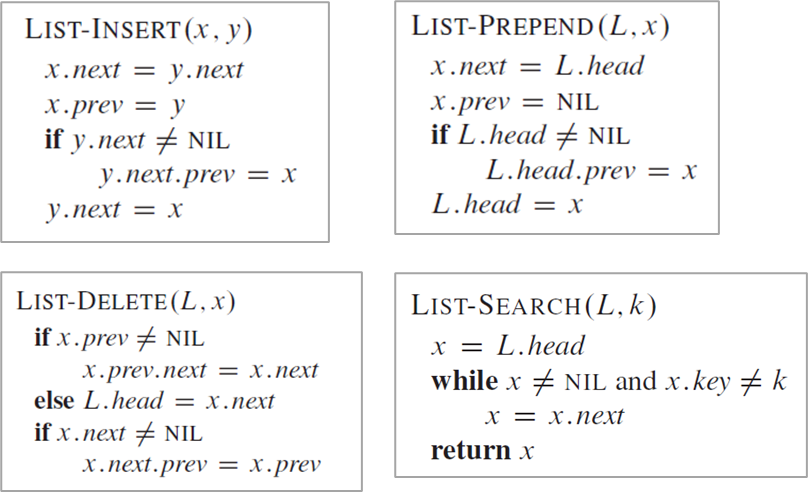

In [14]:
class Node:
    def __init__(self, key):
        self.key = key
        self.next = None
        self.prev = None

class LinkedList:
    def __init__(self):
        self.head = None

    def search(self, key):
        x = self.head
        while x is not None and x.key != key:
            x = x.next
        return x

    def prepend(self, key):
        new_node = Node(key)
        new_node.next = self.head
        new_node.prev = None
        if self.head is not None:
            self.head.prev = new_node
        self.head = new_node

    def insert(self, x, y):
        x.next = y.next
        x.prev = y
        if y.next is not None:
            y.next.prev = x
        y.next = x

    def delete(self, x):
        if x.prev is not None:
            x.prev.next = x.next
        else:
            self.head = x.next
        
        if x.next is not None:
            x.next.prev = x.prev

    def display(self):
        current = self.head
        while current:
            print(current.key, end=" -> ")
            current = current.next
        print("None")

# Test the LinkedList class
linked_list = LinkedList()
linked_list.prepend(10)
linked_list.prepend(20)
linked_list.prepend(30)

linked_list.display()  # Output: 30 -> 20 -> 10 -> None

node_to_delete = linked_list.search(20)
if node_to_delete:
    linked_list.delete(node_to_delete)

linked_list.display()  # Output: 30 -> 10 -> None

node_to_insert = linked_list.search(30)
new_node = Node(25)
linked_list.insert(new_node, node_to_insert)

linked_list.display()  # Output: 30 -> 25 -> 10 -> None


30 -> 20 -> 10 -> None
30 -> 10 -> None
30 -> 25 -> 10 -> None


#### b) Create a playlist for a music player.

In [10]:
class SongNode:
    def __init__(self, title, artist):
        self.title = title
        self.artist = artist
        self.next_song = None

class Playlist:
    def __init__(self):
        self.head = None

    def add_song(self, title, artist):
        new_song = SongNode(title, artist)
        if not self.head:
            self.head = new_song
        else:
            current = self.head
            while current.next_song:
                current = current.next_song
            current.next_song = new_song

    def display_playlist(self):
        current = self.head
        while current:
            print(f"{current.title} by {current.artist}")
            current = current.next_song

# Create a playlist and add songs
playlist = Playlist()
playlist.add_song("Song 1", "Artist 1")
playlist.add_song("Song 2", "Artist 2")
playlist.add_song("Song 3", "Artist 3")

# Display the playlist
print("Playlist:")
playlist.display_playlist()


Playlist:
Song 1 by Artist 1
Song 2 by Artist 2
Song 3 by Artist 3
